## LDA Topic Modeling

In [1]:
import pandas as pd
from gensim import corpora
import numpy as np
import re
import warnings

from konlpy.tag import Mecab
from gensim.models import FastText
from nltk.tokenize import sent_tokenize
from sqlalchemy import create_engine
from tqdm import tqdm_notebook
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

### tokenized_doc 호출

In [13]:
case_list_사기 = pd.read_csv('./00. Data/case_list_사기.csv')
case_list_사기['X'].head()

0      상고이유를 판단한다.  . 불가벌적 사후행위에 대한 판단유사수신행위의 규제에 관...
1      상고이유를 판단한다.   . 피고인  피고인  피고인  피고인  피고인 에 대한...
2      직권으로 판단한다.   . 의료법 위반의 점에 관한 공소사실의 요지   피고인은...
3      상고이유를 판단한다.  . 사건의 개요와 쟁점   의료법 위반의 점에 관한 공소...
4      . 이 법원의 심판범위  원심은 배상신청인들의 배상신청을 모두 각하하였다. 소송...
Name: X, dtype: object

In [14]:
clean_sentence_tokened = []
for sent in tqdm_notebook(case_list_사기['X']):
    clean_sentence_tokened.append(re.sub('[^ 가-힣]', '', sent))

C:\Users\장희중학부재학통계학과\AppData\Local\Temp\ipykernel_22140\3058121797.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sent in tqdm_notebook(case_list_사기['X']):


  0%|          | 0/2262 [00:00<?, ?it/s]

In [16]:
from konlpy.tag import Okt
okt = Okt()

tokenized_vocab_nouns = []

for sent in tqdm_notebook(clean_sentence_tokened):
    token_word = okt.nouns(sent)
    tokenized_vocab_nouns.append(token_word)


C:\Users\장희중학부재학통계학과\AppData\Local\Temp\ipykernel_17464\1117616583.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sent in tqdm_notebook(clean_sentence_tokened):


  0%|          | 0/2262 [00:00<?, ?it/s]

In [15]:
from konlpy.tag import Kkma

kkma = Kkma()
tokenized_vocab_nouns_kkm = []

for sent in tqdm_notebook(clean_sentence_tokened):
    token_word = kkma.nouns(sent)
    tokenized_vocab_nouns_kkm.append(token_word)

C:\Users\장희중학부재학통계학과\AppData\Local\Temp\ipykernel_22140\3300018881.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sent in tqdm_notebook(clean_sentence_tokened):


  0%|          | 0/2262 [00:00<?, ?it/s]

In [39]:
# import pickle
# with open("tokenized_vocab_nouns.pkl", "wb") as f:
#     pickle.dump(tokenized_vocab_nouns, f)

In [16]:
# import pickle
# with open("tokenized_vocab_nouns_kkm.pkl", "wb") as f:
#     pickle.dump(tokenized_vocab_nouns_kkm, f)

In [17]:
import pickle

with open('tokenized_vocab_nouns_kkm.pkl', 'rb') as f:
    tokenized_vocab_nouns_kkm = pickle.load(f)

with open('tokenized_vocab_nouns.pkl', 'rb') as f:
    tokenized_vocab_nouns = pickle.load(f)

In [22]:
# 각 리스트 내에서 단어의 길이가 1인 단어를 삭제하는 함수
def remove_single_char_words_from_lists(nested_list):
    for inner_list in nested_list:
        inner_list[:] = [word for word in inner_list if len(word) > 1]

# 단어의 길이가 1인 단어 삭제
remove_single_char_words_from_lists(tokenized_vocab_nouns_kkm)
remove_single_char_words_from_lists(tokenized_vocab_nouns)

## LDA 모델 훈련

In [23]:
from gensim import corpora
import gensim
dictionary = corpora.Dictionary(tokenized_vocab_nouns)
corpus = [dictionary.doc2bow(text) for text in tokenized_vocab_nouns]

NUM_TOPICS = 20 # 20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.036*"사실" + 0.030*"소외" + 0.028*"진술" + 0.025*"피해자"')
(1, '0.029*"규정" + 0.022*"경우" + 0.021*"행위" + 0.019*"적용"')
(2, '0.039*"입찰" + 0.025*"공사" + 0.023*"소외" + 0.015*"낙찰"')
(3, '0.024*"범죄" + 0.022*"피해자" + 0.022*"범행" + 0.015*"사건"')
(4, '0.057*"소외" + 0.027*"사실" + 0.012*"진술" + 0.011*"증인"')
(5, '0.026*"지급" + 0.021*"수표" + 0.021*"발행" + 0.019*"변제"')
(6, '0.022*"제조" + 0.021*"필로폰" + 0.020*"게임" + 0.013*"판매"')
(7, '0.021*"의료" + 0.018*"기관" + 0.018*"개설" + 0.017*"병원"')
(8, '0.023*"은행" + 0.019*"보증" + 0.018*"사실" + 0.018*"대한"')
(9, '0.025*"농지" + 0.020*"분배" + 0.017*"토지" + 0.014*"원심"')
(10, '0.033*"소외" + 0.033*"피해자" + 0.032*"보험" + 0.031*"차량"')
(11, '0.025*"행위" + 0.017*"거래" + 0.012*"사용" + 0.012*"의사"')
(12, '0.092*"소외" + 0.053*"회사" + 0.011*"사실" + 0.009*"생략"')
(13, '0.040*"원심" + 0.032*"판결" + 0.031*"사실" + 0.023*"위조"')
(14, '0.062*"계좌" + 0.047*"명의" + 0.042*"소외" + 0.033*"번호"')
(15, '0.043*"이유" + 0.042*"원심" + 0.041*"판결" + 0.035*"상고"')
(16, '0.073*"소외" + 0.018*"저축은행" + 0.017*"사업" + 0.014*"대출"')
(17, '0.028*"사건" +

In [25]:
from gensim import corpora
import gensim
dictionary_kkm = corpora.Dictionary(tokenized_vocab_nouns_kkm)
corpus_kkm = [dictionary_kkm.doc2bow(text) for text in tokenized_vocab_nouns_kkm]

NUM_TOPICS = 20 # 20개의 토픽, k=20
ldamodel_kkm = gensim.models.ldamodel.LdaModel(corpus_kkm, num_topics = NUM_TOPICS, id2word=dictionary_kkm, passes=15)
topics = ldamodel_kkm.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.000*"주문" + 0.000*"이유" + 0.000*"유죄" + 0.000*"피고인"')
(1, '0.001*"유가증권변조" + 0.001*"유가증권변조죄" + 0.001*"변조라" + 0.001*"변조유가증권행사"')
(2, '0.001*"한약사" + 0.000*"읽기" + 0.000*"위탁대리점" + 0.000*"불통"')
(3, '0.011*"보호법" + 0.010*"사회보호법" + 0.010*"감호" + 0.009*"보호감호"')
(4, '0.002*"관련" + 0.002*"결론" + 0.002*"이하" + 0.002*"주식회사"')
(5, '0.000*"사실" + 0.000*"판단" + 0.000*"공소외" + 0.000*"증거"')
(6, '0.003*"조서" + 0.003*"진술" + 0.003*"판사" + 0.003*"피의자"')
(7, '0.002*"헌법위반" + 0.001*"공시송달" + 0.001*"소송촉진" + 0.001*"상소권회복청구"')
(8, '0.000*"사건" + 0.000*"사실" + 0.000*"피고인" + 0.000*"원심"')
(9, '0.000*"사실" + 0.000*"공소" + 0.000*"선고" + 0.000*"이유"')
(10, '0.000*"구매요청금" + 0.000*"가상현금" + 0.000*"전자복권" + 0.000*"구매명령"')
(11, '0.006*"병원" + 0.005*"의료" + 0.005*"보험" + 0.005*"치료"')
(12, '0.001*"대폐차" + 0.001*"소송당사자인" + 0.000*"운수사업법" + 0.000*"공급허용"')
(13, '0.000*"주문" + 0.000*"행위" + 0.000*"해당" + 0.000*"공소"')
(14, '0.001*"무자원" + 0.001*"특정계좌" + 0.000*"국제금융기구" + 0.000*"집행부"')
(15, '0.008*"재판장" + 0.008*"원심" + 0.008*"판결" + 0.008*"이유"')
(16, '0.000

## LDA 시각화

In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f]

In [11]:
font_path = 'C:\\Users\\장희중학부재학통계학과\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareL.ttf'

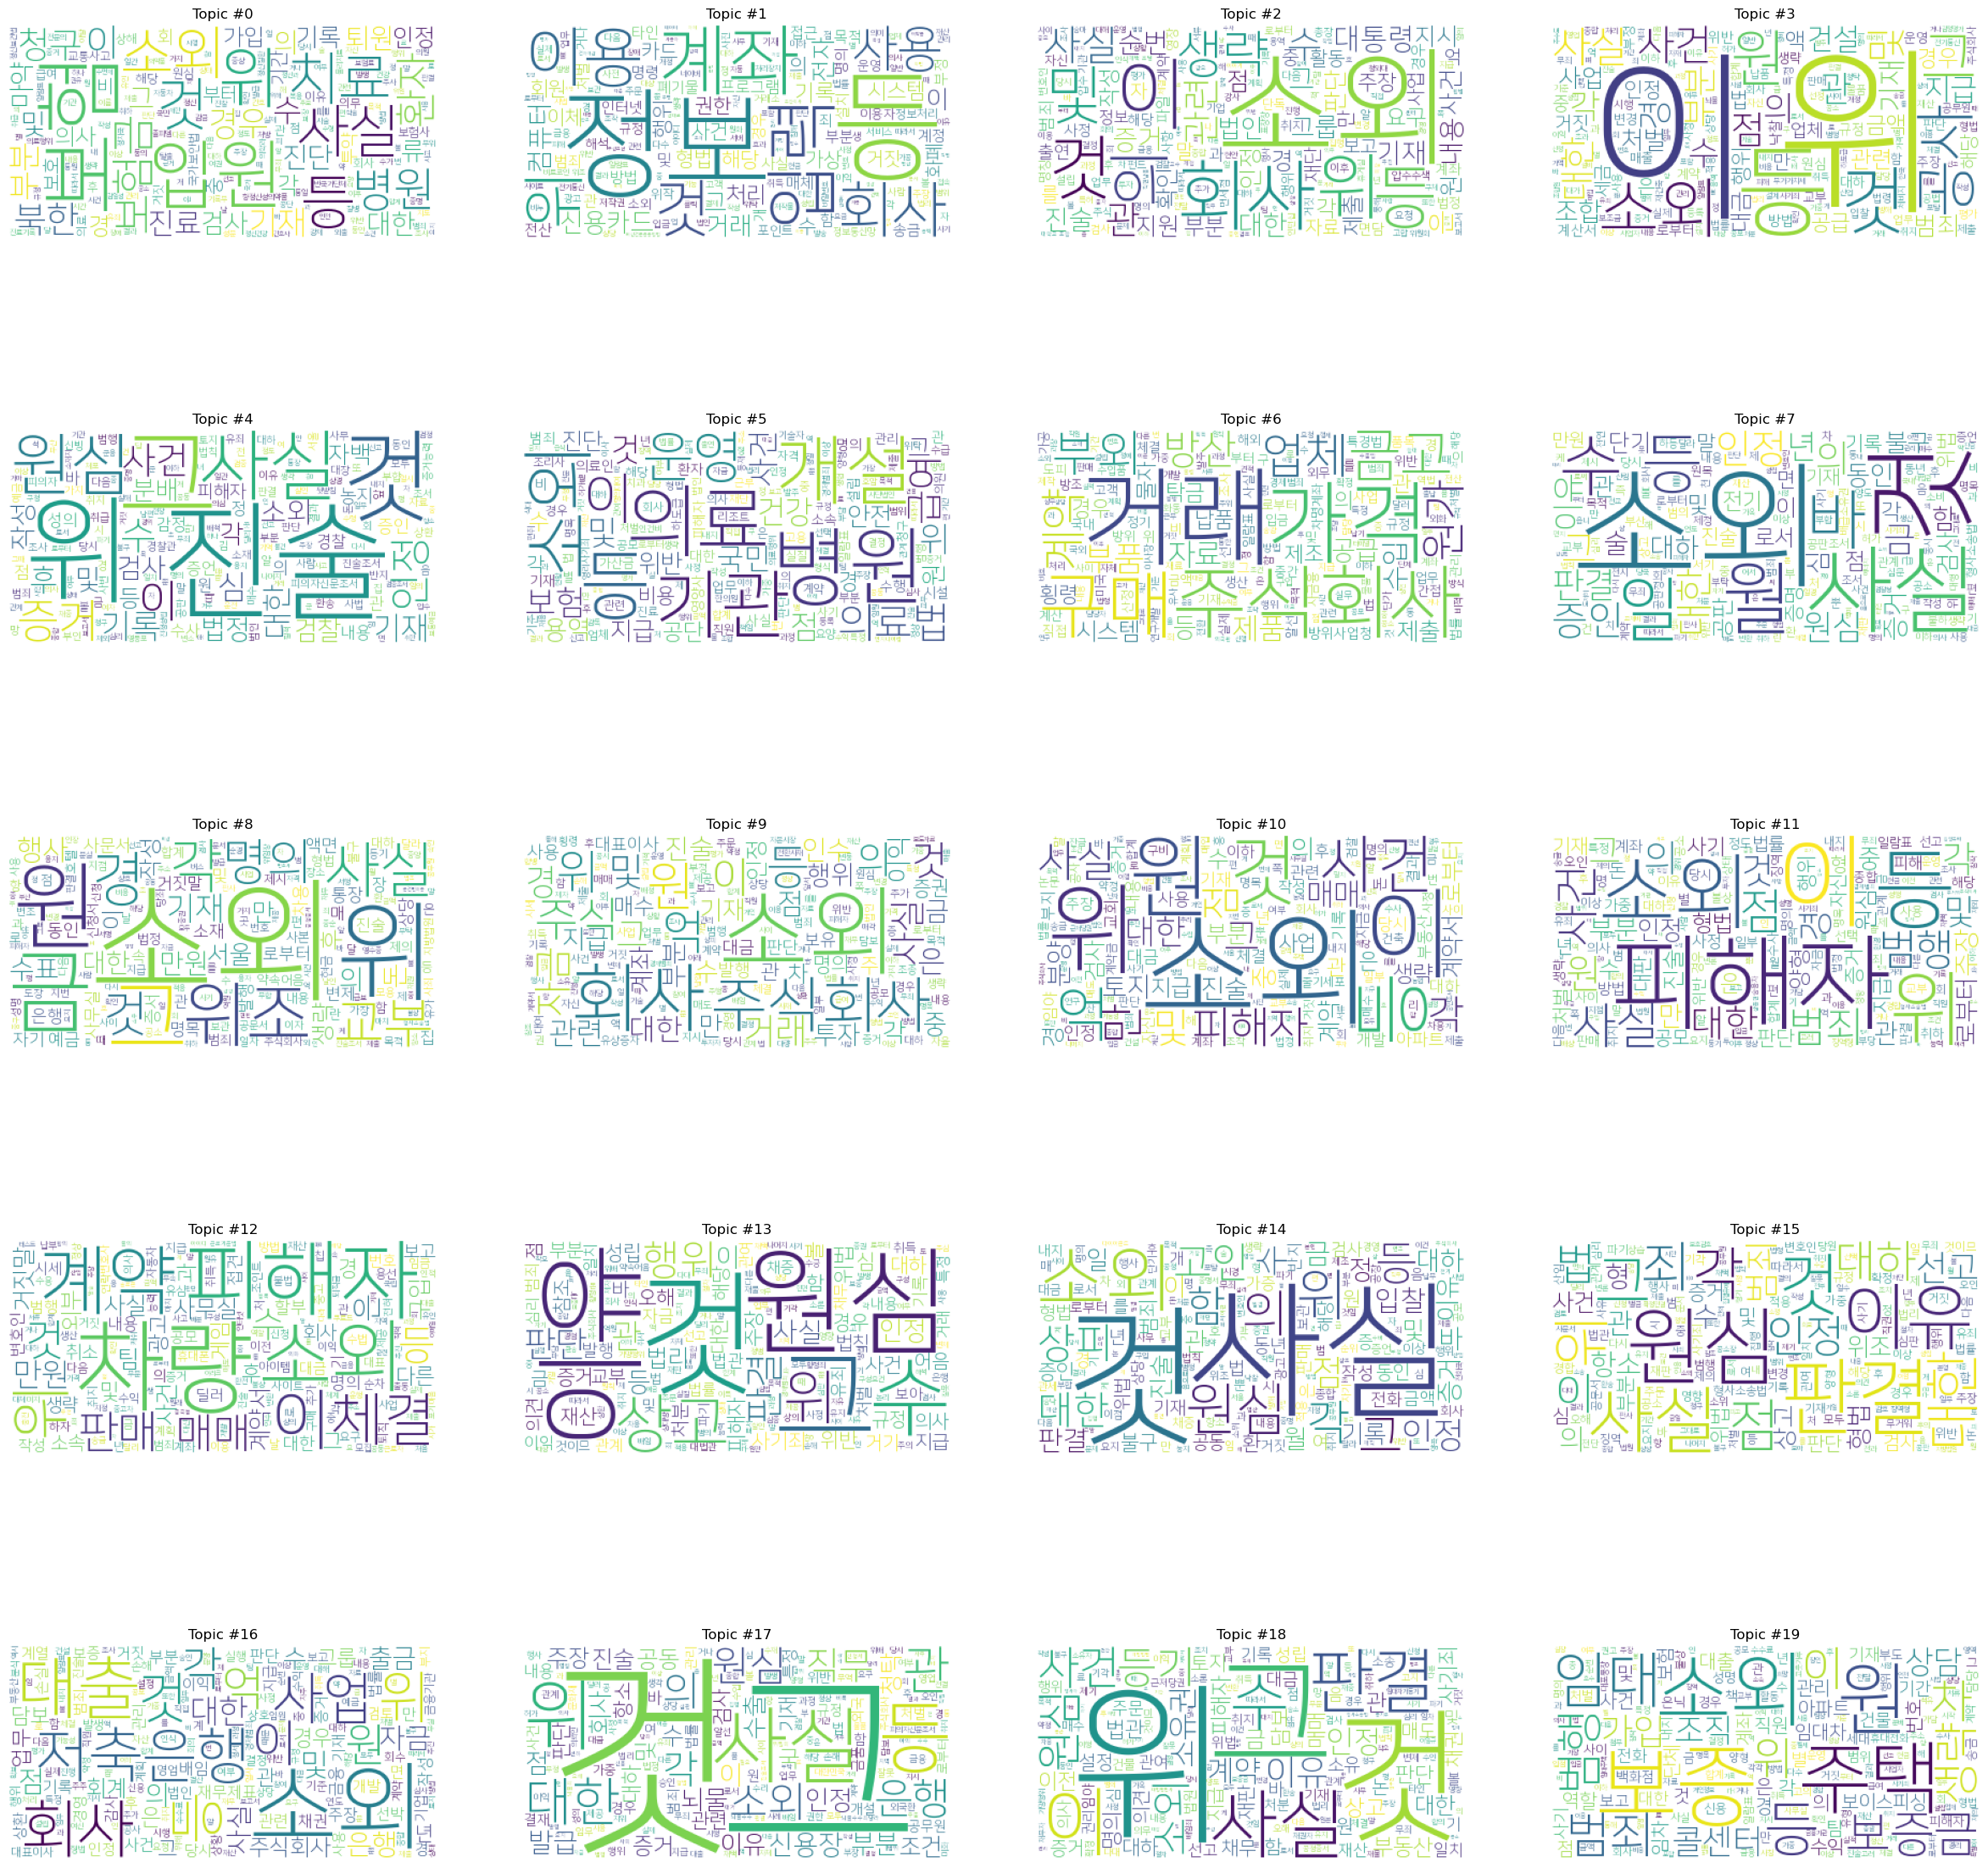

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color='white', font_path=font_path) # 워드클라우드

plt.figure(figsize=(30,30))
for t in range(ldamodel.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(ldamodel.show_topic(t,200))
    im = wc.generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

plt.savefig('LDA_wordcloud.png', bbox_inches='tight') 

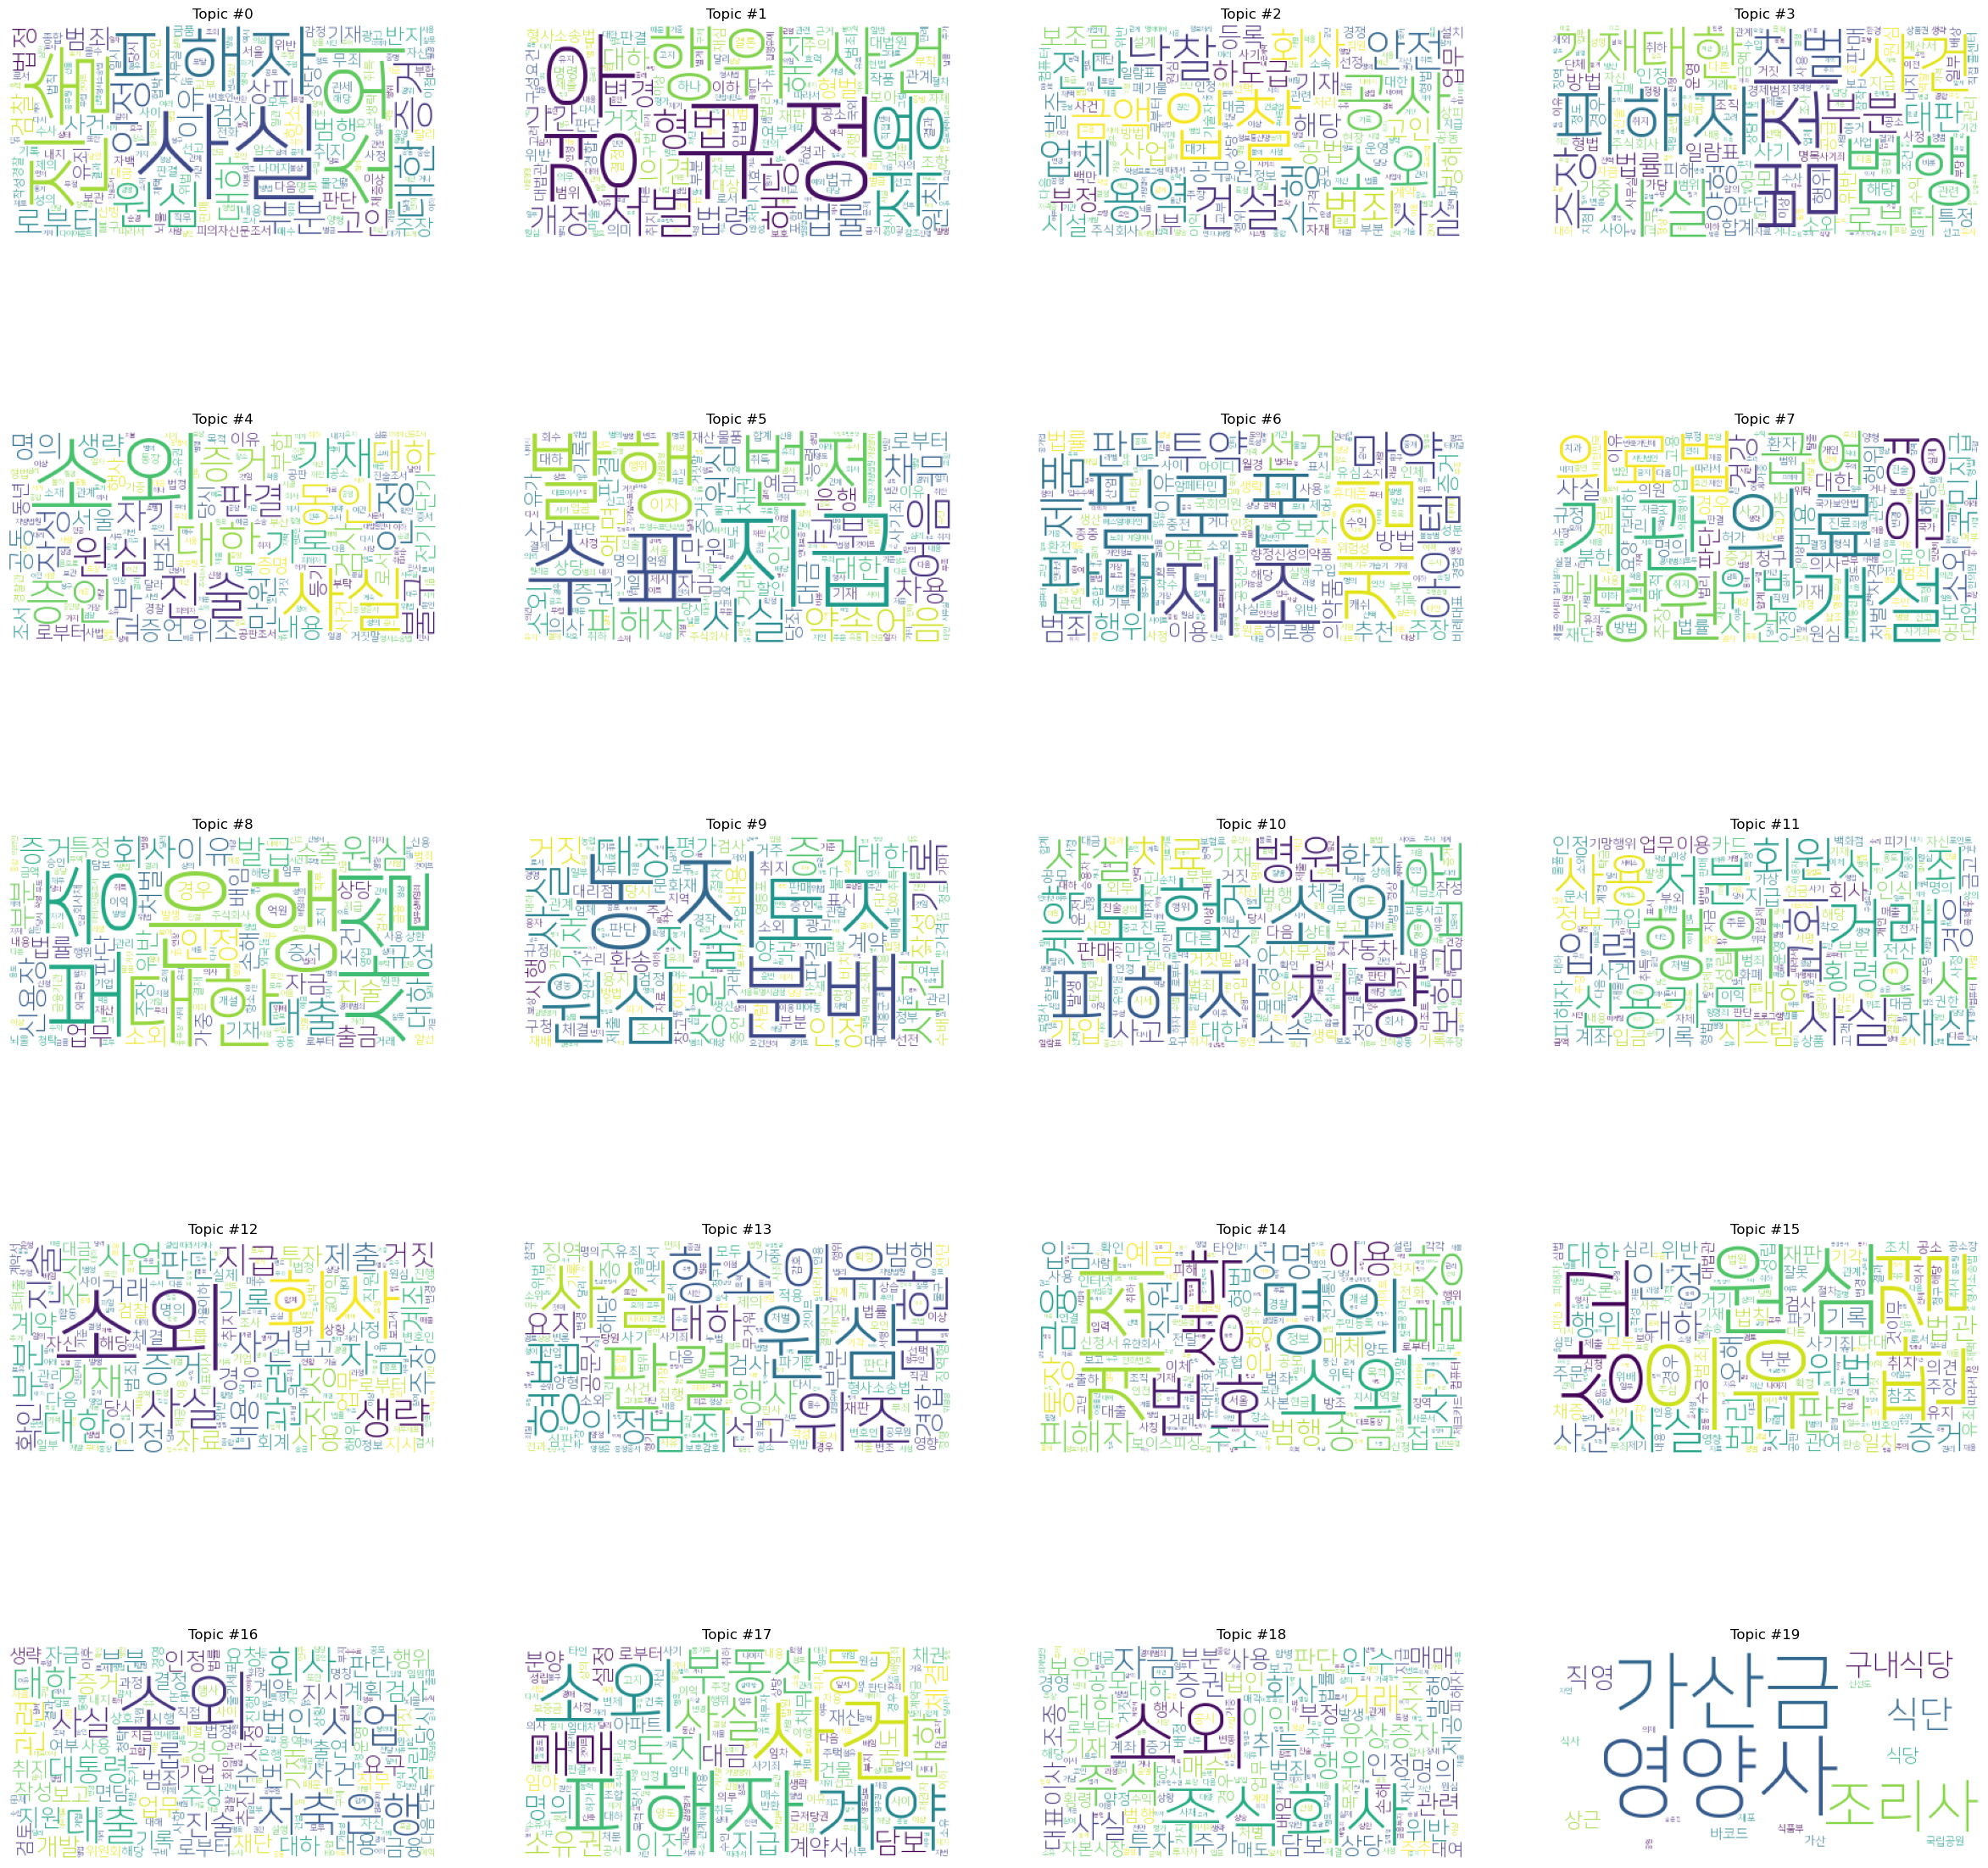

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc_kkm = WordCloud(background_color='white', font_path=font_path) # 워드클라우드

plt.figure(figsize=(30,30))
for t in range(ldamodel_kkm.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(ldamodel.show_topic(t,200))
    im = wc_kkm.generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

plt.savefig('LDA_wordcloud_kkm.png', bbox_inches='tight') 